In [416]:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from pymongo import MongoClient
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
import numpy as np

import matplotlib.pyplot as plt
import datetime
import urllib.request
import json

resp = urllib.request.urlopen('http://localhost:7100/tickets/shanghai?st=2018-03-01&et=2018-04-09')
ticketData = resp.read()
ticketData = json.loads(ticketData)

resp = urllib.request.urlopen('http://localhost:7100/day/rank?st=2018-03-01&et=2018-04-09')
dayData = resp.read()
dayData = json.loads(dayData)

resp = urllib.request.urlopen('http://localhost:7100/weather/history?st=2018-03-01&et=2018-04-09')
weaData = resp.read()
weaData = json.loads(weaData)


In [551]:



ticketList = []
ticketDayData = []

for item in ticketData:
    dayList = np.array(item['dayList'])
    dayList = dayList[-4:]
    
    ticketList.append(item['ticketNum'])
    ticketDayData.append(dayList)

ticketDayData = np.array(ticketDayData)


weaRank = []

for item in weaData:
    rank = sum(item['rank'])
    weaDatas[item['date']] = rank
    weaRank.append(rank)
    
dayRank = []
for date in dayData:
    rank = dayData[date]
    rank = np.array(rank)
    rank = sum(rank)
    dayRank.append(rank)
    
    
weaRank = np.array(weaRank)
dayRank = np.array(dayRank)

dateRank = weaRank + dayRank

dateRank.min()

10.5

[2559.]


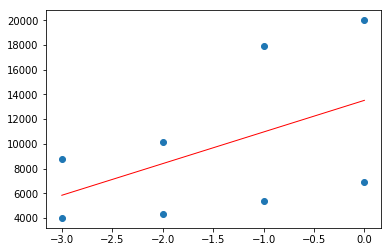

In [627]:
filterData = np.where( (dateRank > 30) & (dateRank < 40))
# filterData = np.where( (dateRank > 26) & (dateRank < 30))
# filterData = np.where( (dateRank > 10) & (dateRank < 20))

x = np.array([])
y = np.array([])
for index in filterData:
    dayList = ticketDayData[index]
    dayList = dayList.T
    
    x = np.append(x, dayList[0, :])
    y = np.append(y, dayList[1, :])

xx = x.reshape((len(x), -1))

regr = linear_model.LinearRegression()
regr.fit(xx, y)


plt.scatter(x, y)
plt.plot(xx, regr.predict(xx), color='red',linewidth=1)
print(regr.coef_)
